# Updated House Price Prediction Analysis

This notebook includes updated analyses incorporating variable reduction based on VIF and correlation insights, along with additional visualizations to aid in understanding the data more comprehensively.


In [5]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

# Load the cleaned dataset
data_fillmean = pd.read_csv('dataset/cleaned_data.csv')

# Display the first few rows to confirm loading
data_fillmean.head()


,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_basement,yr_renovated,street,city,statezip,country,house_age,years_since_renovation,price_per_sqft,bed_to_bath_ratio
0,2014-05-02,313000.0,3.0,1.50,1340,1.5,0,0,3,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,68,18,233.582090,2.000000
1,2014-05-02,342000.0,3.0,2.00,1930,1.0,0,0,4,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,57,0,177.202073,1.500000
2,2014-05-02,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,0,857 170th Pl NE,Bellevue,WA 98008,USA,60,0,210.000000,1.333333
3,2014-05-02,550000.0,4.0,2.50,1940,1.0,0,0,4,800,1992,9105 170th Ave NE,Redmond,WA 98052,USA,47,31,283.505155,1.600000
4,2014-05-02,490000.0,2.0,1.00,880,1.0,0,0,3,0,1994,522 NE 88th St,Seattle,WA 98115,USA,85,29,556.818182,2.000000


In [6]:
# Drop columns based on VIF and correlation analysis
columns_to_drop = ['sqft_above', 'yr_built', 'sqft_lot', 'total_sqft']
data_fillmean.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Drop any remaining non-numeric columns
data_fillmean = data_fillmean.select_dtypes(include=[np.number])


# Display remaining columns
data_fillmean.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_renovated', 'house_age',
       'years_since_renovation', 'price_per_sqft', 'bed_to_bath_ratio'],
      dtype='object')

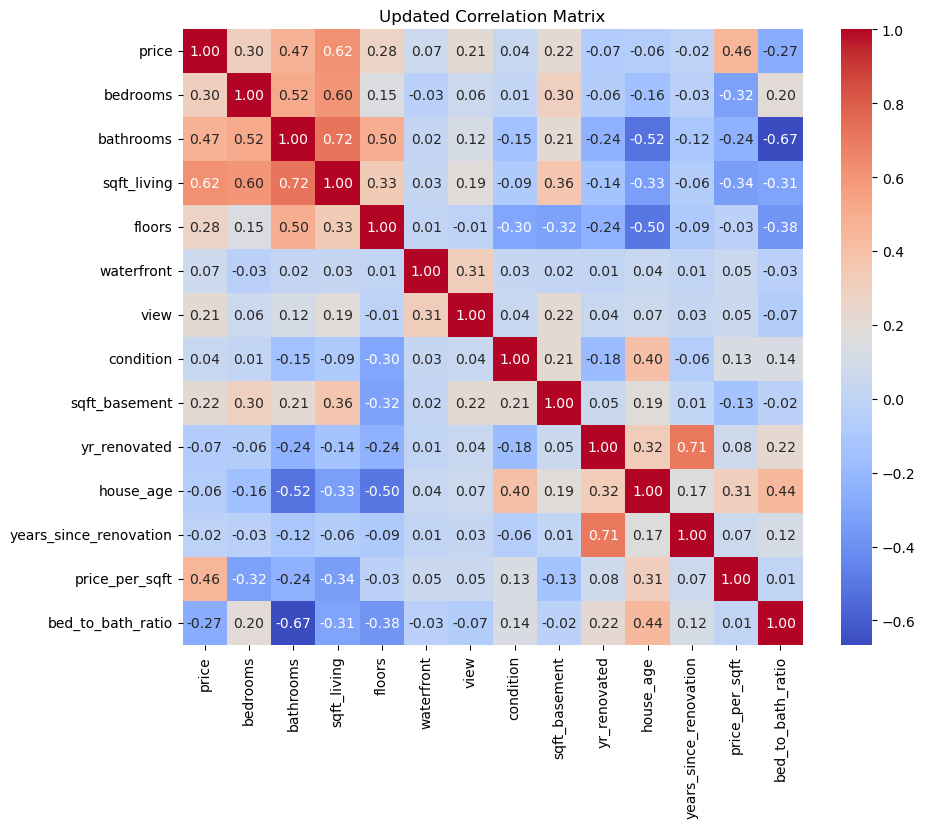

In [7]:
# Creating heatmap for updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_fillmean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Updated Correlation Matrix')
plt.show()


c:\Users\hkhat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


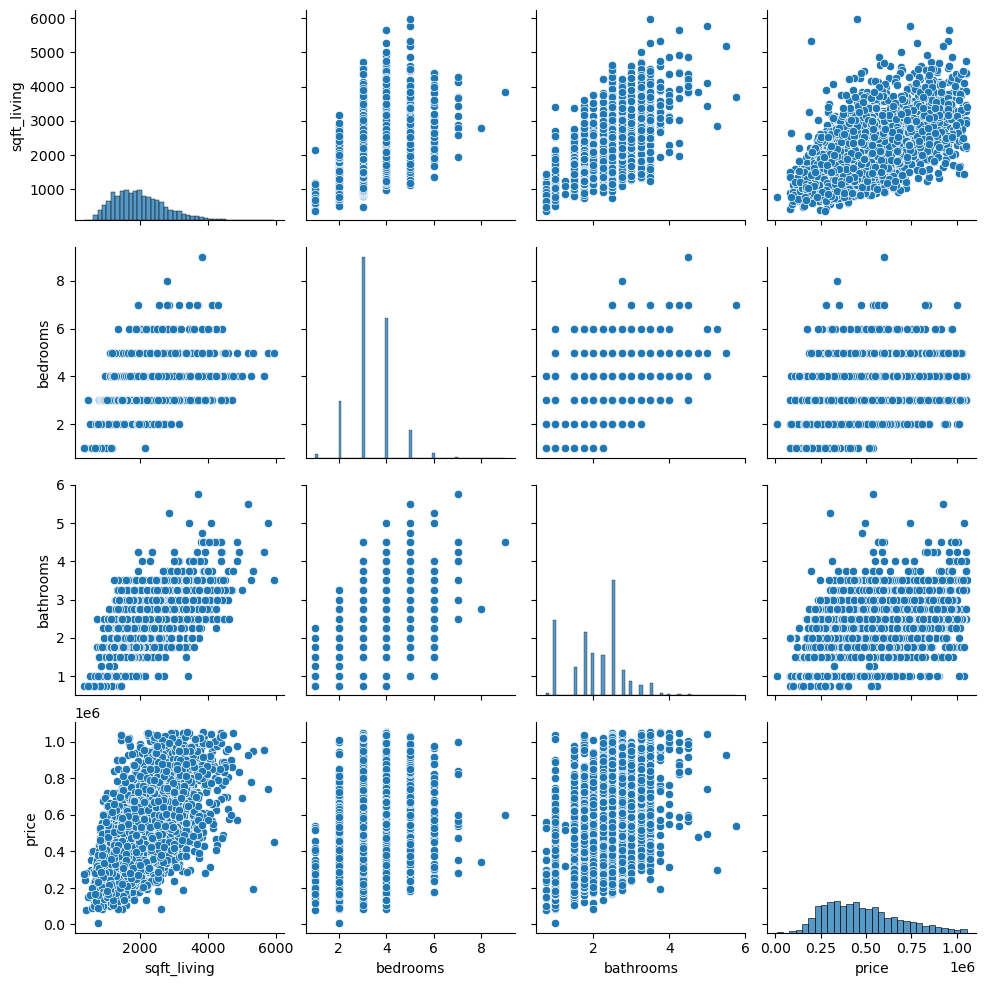

In [8]:
# Pair plot for sqft_living, bedrooms, bathrooms
sns.pairplot(data_fillmean[['sqft_living', 'bedrooms', 'bathrooms', 'price']])
plt.show()


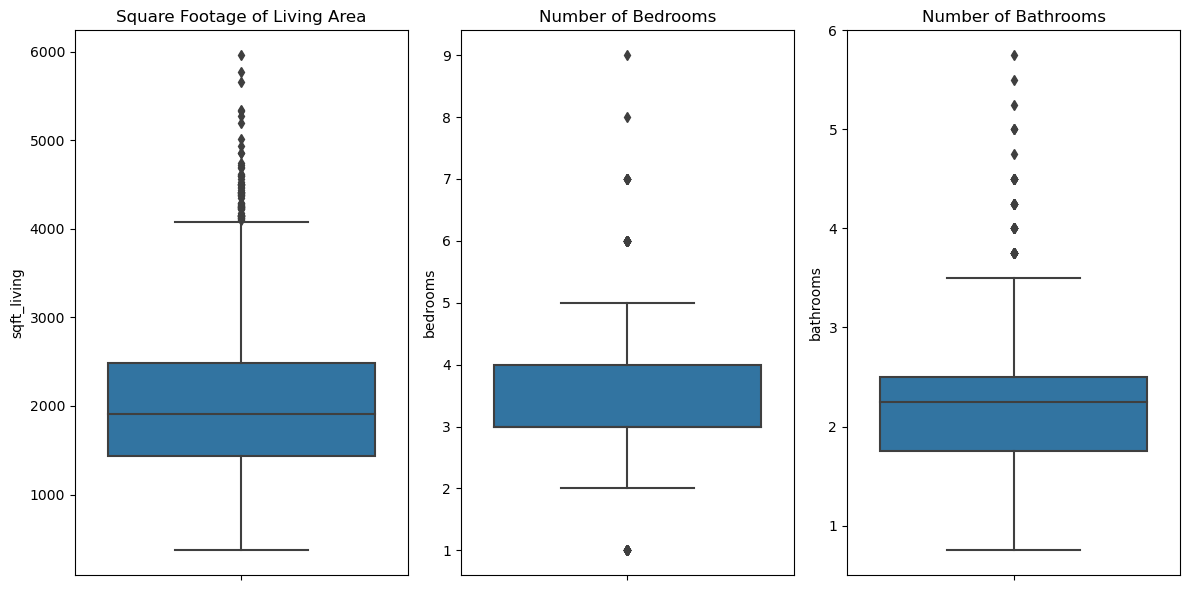

In [9]:
# Box plots for sqft_living, bedrooms, and bathrooms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=data_fillmean['sqft_living'])
plt.title('Square Footage of Living Area')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_fillmean['bedrooms'])
plt.title('Number of Bedrooms')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_fillmean['bathrooms'])
plt.title('Number of Bathrooms')

plt.tight_layout()
plt.show()


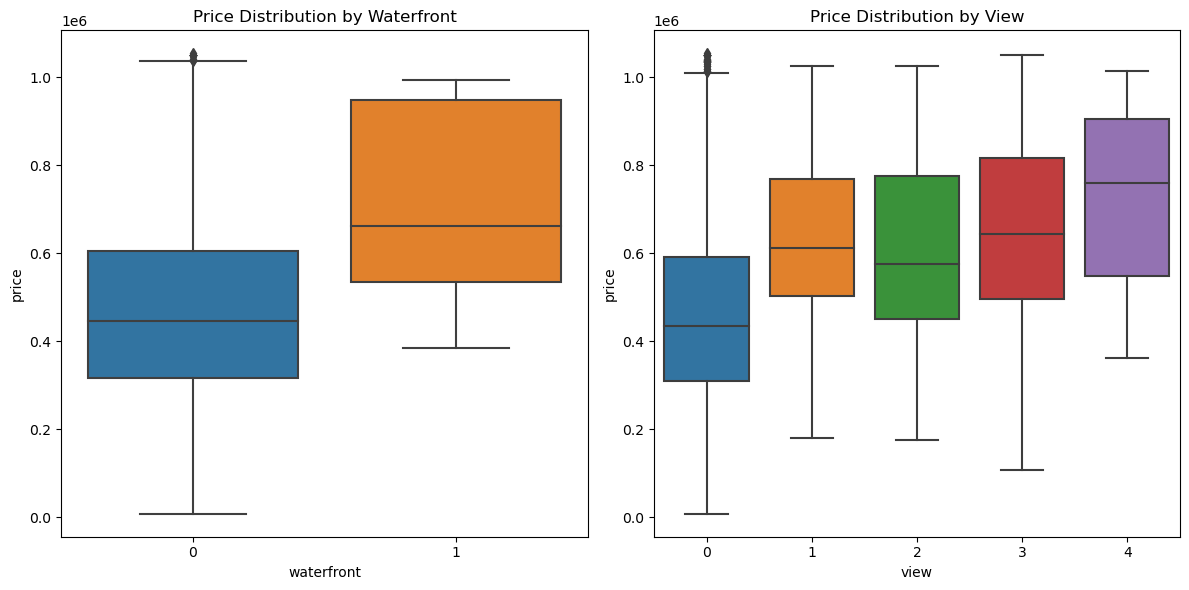

In [10]:
# Additional plots for 'waterfront' and 'view' features
# Box plots for price against waterfront and view
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_fillmean['waterfront'], y=data_fillmean['price'])
plt.title('Price Distribution by Waterfront')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_fillmean['view'], y=data_fillmean['price'])
plt.title('Price Distribution by View')

plt.tight_layout()
plt.show()